In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import torch
%matplotlib inline

/Users/arunprakash/anaconda/envs/pytorch_practice/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("diabetes.csv",header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0


In [4]:
data.shape

(759, 9)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:-1], data.iloc[:,-1], random_state = 22, test_size = 0.2)

In [6]:
X_train.shape, X_test.shape

((607, 8), (152, 8))

In [7]:
X_train = torch.tensor(torch.from_numpy(X_train.values), dtype = torch.float)

In [8]:
X_test = torch.tensor(torch.from_numpy(X_test.values), dtype = torch.float)

In [9]:
y_train = torch.tensor(torch.from_numpy(y_train.values).reshape(-1,1), dtype = torch.float)

In [10]:
y_test = torch.tensor(torch.from_numpy(y_test.values).reshape(-1,1), dtype = torch.float)

# Logistic Regression Model

In [11]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression,self).__init__()
        self.linear = torch.nn.Linear(8,1)
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self,x):
        l1 = self.linear(x)
        o1 = self.sigmoid(l1)
        return o1

In [12]:
model = LogisticRegression()

In [13]:
criterion = torch.nn.BCELoss()

In [14]:
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.01)

In [15]:
epoch_list = []
train_loss = []
test_loss = []

In [16]:
for epoch in range(500):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    epoch_list.append(epoch)
    train_loss.append(loss.item())
    loss.backward()
    optimizer.step()
    test_pred = model(X_test)
    test_l = criterion(test_pred, y_test)
    optimizer.zero_grad()
    test_loss.append(test_l)

    

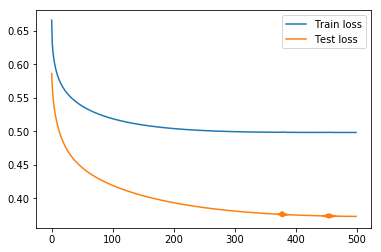

In [17]:
plt.plot(epoch_list, train_loss, label = "Train loss")
plt.plot(epoch_list, test_loss, label = "Test loss")
plt.legend()

# Test Set Accuracy

In [18]:
y_pred = model(X_test)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
y_pred = y_pred >0.5

In [21]:
accuracy_score(y_pred, y_test)

0.8552631578947368

# Now let's create wide and deep network

In [22]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression,self).__init__()
        self.l1 = torch.nn.Linear(8,6)
        self.l2 = torch.nn.Linear(6,4)
        self.l3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()
        self.tanh = torch.nn.Tanh()
    def forward(self,x):
        o1 = self.relu(self.l1(x))
        o2 = self.relu(self.l2(o1))
        o3 = self.relu(self.l3(o2))
        return self.sigmoid(o3)

In [23]:
model = LogisticRegression()

In [24]:
criterion = torch.nn.BCELoss()

In [25]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [26]:
epoch_list = []
train_loss = []
test_loss = []

In [27]:
for epoch in range(400):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    epoch_list.append(epoch)
    train_loss.append(loss.item())
    loss.backward()
    optimizer.step()
    test_pred = model(X_test)
    test_l = criterion(test_pred, y_test)
    optimizer.zero_grad()
    test_loss.append(test_l)

    

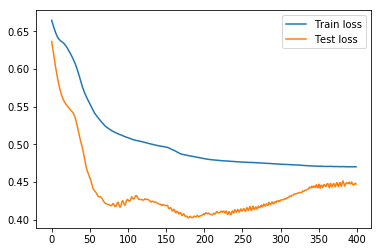

In [28]:
plt.plot(epoch_list, train_loss, label = "Train loss")
plt.plot(epoch_list, test_loss, label = "Test loss")
plt.legend()

# Test Accuracy

In [29]:
y_pred = model(X_test)

In [30]:
y_pred = y_pred >0.5

In [31]:
accuracy_score(y_pred, y_test)

0.8223684210526315